# Project Capstone Module 2 Muhammad Nafi Adziq

# Background

 Supermarket Teby Meong is a popular highly demanded super store available on every country. This dataset gives off a glimpse of customer datasets from the famous Teby Meong Supermarket so we could do an understanding and anaylisis on how the customer varies on Teby Meong mart. With this data we must search for data errors and fix data inputs so that we can pull an outcome that would make more profit just by analyzing the data.

## Problem Formula

- What is customer behaviour?
- Data distribution of supermarket income according to customer categories? 
- Customers income according to customer categories?
- The campaign is most famous on which category?
- Is the website effectiveness comparable to any other shopping methods?

## Data Dictionary

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
  
**Products**
  
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
  
**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
  
**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/Users/meowbook/Documents/Purwadhika/CAPSTONE/2/Supermarket Customers.csv', sep ='\t')

In [3]:
# To ease data reading we must first clean the data thoroughly. The first step of data clealing should be visualizing the data 
# so that we could know what were working on.
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
# After reading the data we can now move further by knowing the info of the data. 
# As shown below, there is some numbers missing in column ['Income'].
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Null and Duplicated Data Cleaning

In [5]:
# To ease it up, we can simplify the info by adding up all the missing data available.
# Now we are able to know that there are 24 datas missing in the column ['Income']
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# These are the complete visualization of datas with a null output in column ['Income']
df.loc[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [7]:
dfNull = pd.DataFrame(df.isna().sum()).rename( columns = { 0 : 'Missing Value'} )
dfNull['Percentage of Missing']=100*round(dfNull['Missing Value']/len(df),4)
dfNull['Percentage of Missing']=round(dfNull['Percentage of Missing'],2).astype(str)+' %'
dfNull

,Missing Value,Percentage of Missing
ID,0,0.0 %
Year_Birth,0,0.0 %
Education,0,0.0 %
Marital_Status,0,0.0 %
Income,24,1.07 %
Kidhome,0,0.0 %
Teenhome,0,0.0 %
Dt_Customer,0,0.0 %
Recency,0,0.0 %
MntWines,0,0.0 %


In [8]:
# Because the null value is a small value compared to the whole data (1%),
# dropping the null value should be a great choice to have a reliable data
df.dropna(inplace = True)

In [9]:
# While counting the missing datas is important, we must not let our guard down by checking if there are any duplicates in the data.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2216, dtype: bool

In [10]:
# After checking we can now conclude that there  is no duplicates in this data.
df.duplicated().sum()

0

## Checking Value Uniqueness

In [11]:
df.describe(include = object)

,Education,Marital_Status,Dt_Customer
count,2216,2216,2216
unique,5,8,662
top,Graduation,Married,31-08-2012
freq,1116,857,12


In [12]:
# In the following order we must now check for the data uniqueness, and remove any odd input.
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [13]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
# This column is supposed to be based on Date Time format but it reads as an object('string') so we must fix it.
df['Dt_Customer'].describe()

count           2216
unique           662
top       31-08-2012
freq              12
Name: Dt_Customer, dtype: object

In [15]:
# After checking for the data inputs, changing the odd data is the best way to continue the data cleaning
df.loc[df['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status'] == 'Together', 'Marital_Status'] = 'Married'

df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In [16]:
df.loc[df['Education'] == '2n Cycle', 'Education'] = 'Master'
df.loc[df['Education'] == 'Graduation', 'Education'] = 'Bachelor'

df['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'Basic'], dtype=object)

In [17]:
# The right format for a 'datetime' data is seen in the following.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = "%d-%m-%Y")
df['Dt_Customer'].describe()

count                             2216
mean     2013-07-10 11:29:27.509025280
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-31 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [18]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Bachelor,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Bachelor,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## Inserting New Usable Column

In [19]:
# An additional column 'Total Amount Spend' is great for future data examinations. 
df.insert(df.columns.get_loc('MntGoldProds')+1, 'MntTotal', df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] 
          + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

In [20]:
# Total children home 'TotalChildHome' to simplify the two columns.
df.insert(df.columns.get_loc('Teenhome')+1, 'TotalChildHome', df['Kidhome'] + df['Teenhome'])

In [21]:
# Total campaign accepted per customer
df.insert(df.columns.get_loc('AcceptedCmp2')+1, 'TotalCmpAcc', df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
          + df['AcceptedCmp1'] + df['AcceptedCmp2'])

In [22]:
# Total purchases made per customer
df.insert(df.columns.get_loc('NumStorePurchases')+1, 'NumPurchasesTotal', df['NumDealsPurchases'] + df['NumWebPurchases']
          + df['NumCatalogPurchases'] + df['NumStorePurchases'])

In [23]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,TotalChildHome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumPurchasesTotal,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,TotalCmpAcc,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,25,7,0,0,0,0,0,0,0,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,6,5,0,0,0,0,0,0,0,3,11,0
2,4141,1965,Bachelor,Married,71613.0,0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,21,4,0,0,0,0,0,0,0,3,11,0
3,6182,1984,Bachelor,Married,26646.0,1,0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,8,6,0,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,19,5,0,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,18,5,0,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Married,64014.0,2,1,3,2014-06-10,56,406,0,30,0,0,8,444,7,8,2,5,22,7,0,0,0,1,0,1,0,3,11,0
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,19,6,0,1,0,0,0,1,0,3,11,0
2238,8235,1956,Master,Married,69245.0,0,1,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,23,3,0,0,0,0,0,0,0,3,11,0


## Data Loading

In [24]:
df.to_csv('capstone 2 clean.csv')

# Data Exploring & Data Analysis

In [25]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

dfNoOutliers = df[(df['Income'] >= lower) & (df['Income'] <= upper)]

## 1. What is Customer Behaviour

In [26]:
# 1. Does Customer Have a paired activity
numCols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
dfCorr = df[numCols].corr()

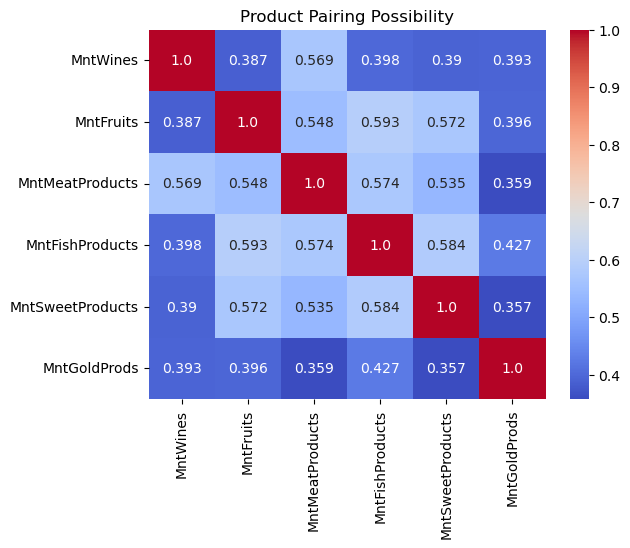

In [27]:
# This correlation method is a substitute for Pearson's method, so we dont need to call the pearson function to check the correlation.
sns.heatmap(dfCorr, annot = True,  cmap = 'coolwarm', fmt = '.3')
plt.title('Product Pairing Possibility')
plt.show()

**Insight** 
- The highest chance of someone buying something together is when they get Fruits and Fish Products
- The least chance of someone buying something together is when they get Meat Products and Gold

**Solution**
- Offer discounts for Fruits if bought with Fish Products, vice versa.

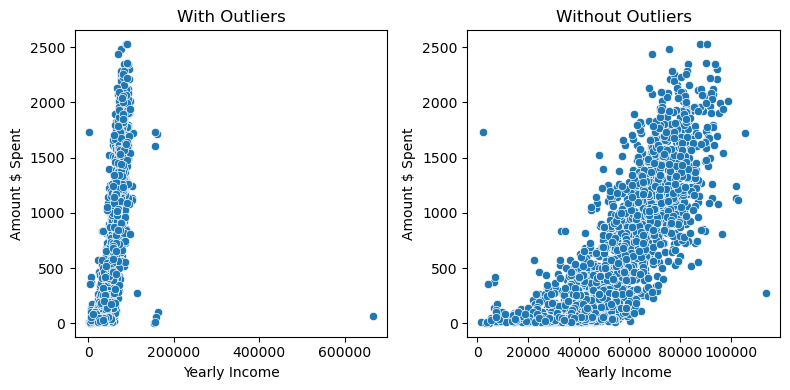

In [53]:
# 2. Is customers expense based on their yearly income?
plt.figure(figsize= (8,4))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x ='Income', y='MntTotal')
plt.xlabel('Yearly Income')
plt.ylabel('Amount $ Spent')
plt.title('With Outliers')

plt.subplot(1,2,2)
sns.scatterplot(data=dfNoOutliers, x='Income', y='MntTotal')
plt.xlabel('Yearly Income')
plt.ylabel('Amount $ Spent')
plt.title('Without Outliers')

plt.tight_layout()
plt.show()

**Insigth**
- From the data visualization including the outliers, we can see that the highest income is way higher than the average income.
- Customer with higher income relatively spends more money

In [29]:
dfNoOutliers['Income'].min()

1730.0

## 2. Data Distribution of Store Income Based on Categories

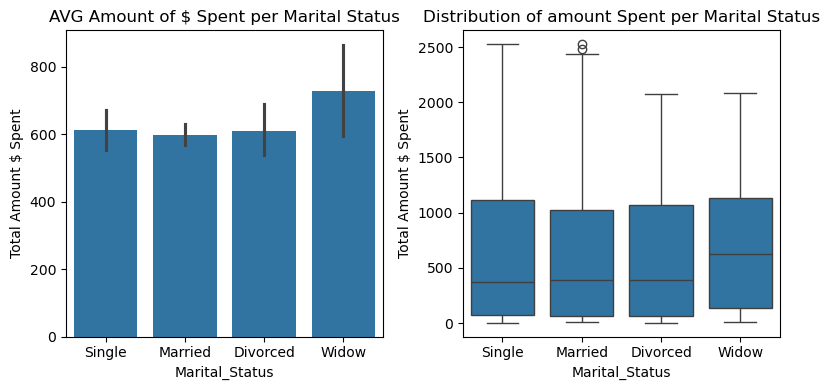

In [52]:
# 1. AVG Store Income Based on Marital Status
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.barplot(data = df, x = 'Marital_Status', y = 'MntTotal')
plt.ylabel('Total Amount $ Spent')
plt.title('AVG Amount of $ Spent per Marital Status')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Marital_Status', y = 'MntTotal')
plt.ylabel('Total Amount $ Spent')
plt.title('Distribution of amount Spent per Marital Status')

plt.tight_layout()
plt.show()

**Insight**
- The highest average store income per marital status comes from the group 'Widow'.
- The least average store income per marital status comes from the group 'Married'.

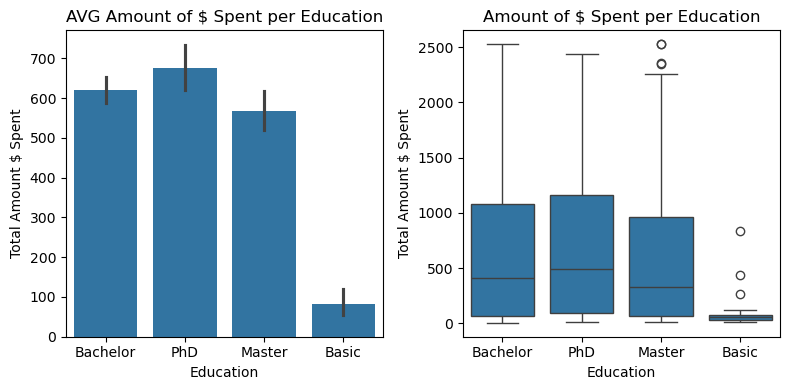

In [51]:
# 2. AVG store income based on education
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.barplot(data = df, x = 'Education', y = 'MntTotal')
plt.ylabel('Total Amount $ Spent')
plt.title('AVG Amount of $ Spent per Education')

plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'Education', y = 'MntTotal')
plt.ylabel('Total Amount $ Spent')
plt.title('Amount of $ Spent per Education')

plt.tight_layout()
plt.show()


**Insight**
- The highest average store income per marital status comes from the group 'PhD'.
- The least average store income per marital status comes from the group 'Basic'.

## 3. The campaign is most famous on which category?

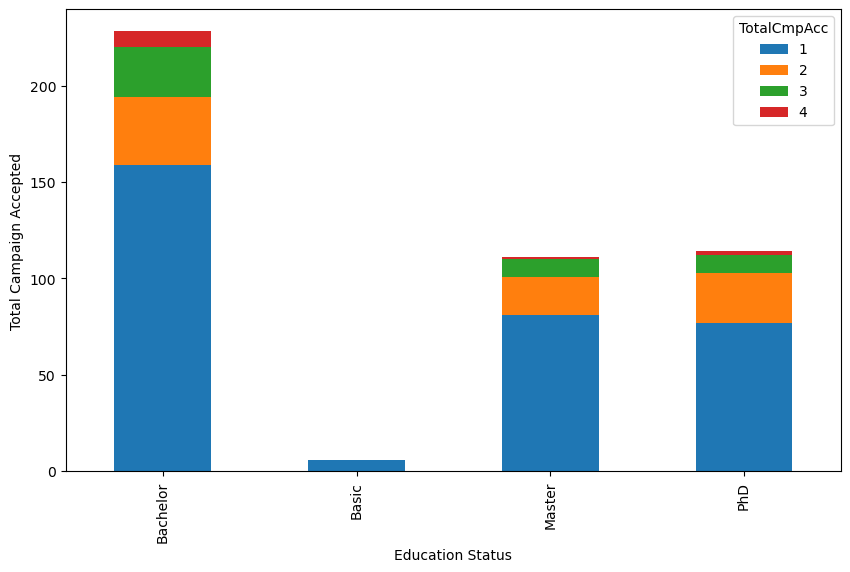

In [55]:
# 1. Based on column ['Education']
# With this data visualization we can see which category is the most into marketing campaign.

dfFilterTotalCmpAcc = df[df['TotalCmpAcc'] > 0]

cross_tab = pd.crosstab(dfFilterTotalCmpAcc['Education'], dfFilterTotalCmpAcc['TotalCmpAcc'])

cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel('Total Campaign Accepted')
plt.xlabel('Education Status')
plt.show()

**Insight**
- Campaign is most famous on education group 'Bachelor'
- Campaign is least famous on education group 'Basic'

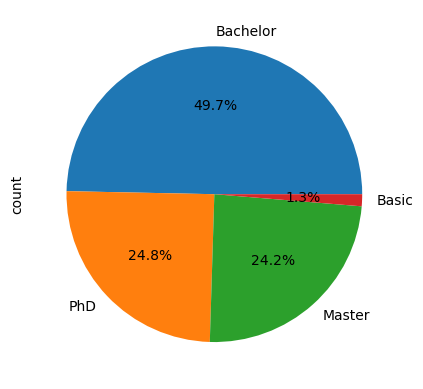

In [33]:
# To make things clearer a piechart should be a great representative as a data visualization.
educationCounts = dfFilterTotalCmpAcc['Education'].value_counts()
educationCounts.plot(kind='pie', autopct='%1.1f%%');

**Insight**
- Campaign is most famous on education group 'Bachelor'
- Campaign is least famous on eduaction group 'Basic'

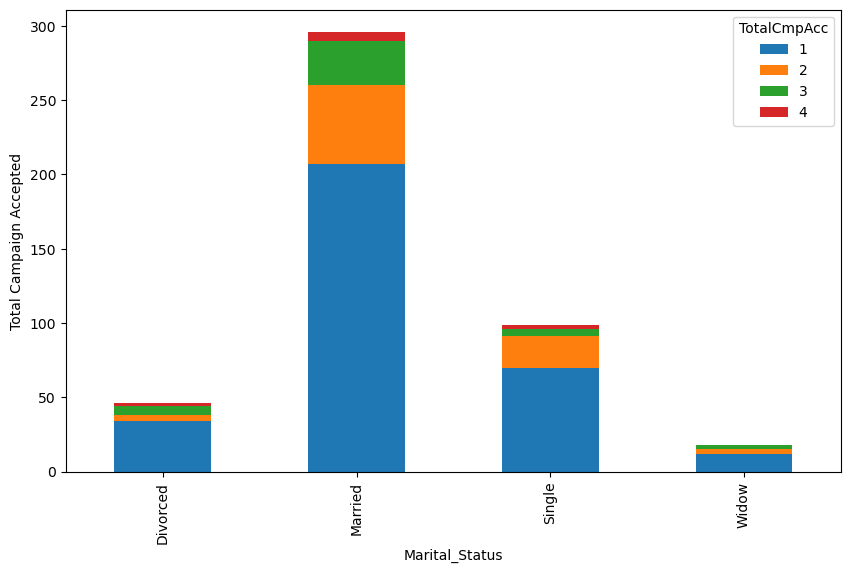

In [56]:
# 2. Based on column ['Marital_Status']
cross_tab = pd.crosstab(dfFilterTotalCmpAcc['Marital_Status'], dfFilterTotalCmpAcc['TotalCmpAcc'])

cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel('Total Campaign Accepted')
plt.xlabel('Marital_Status')
plt.show()

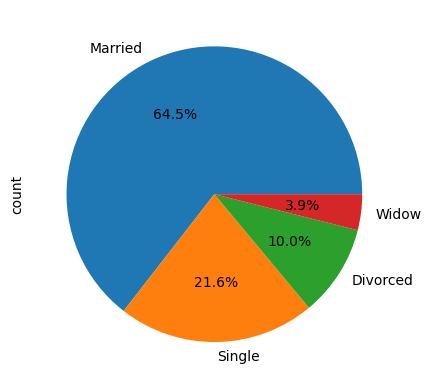

In [57]:
educationCounts = dfFilterTotalCmpAcc['Marital_Status'].value_counts()
educationCounts.plot(kind='pie', autopct='%1.1f%%');

## 4. Customers Income Based on Categories

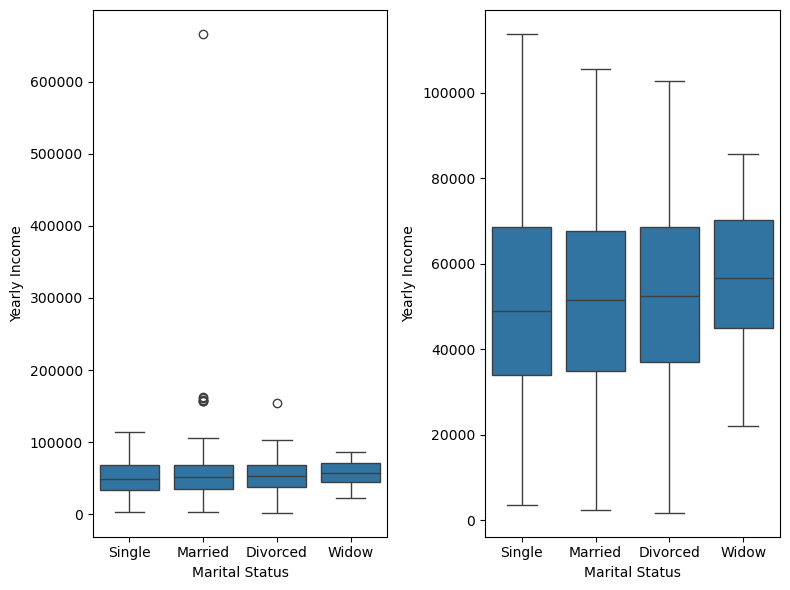

In [36]:
# 1. a. Customer Income based on Marital Status
plt.figure(figsize = (8,6))

plt.subplot(1,2,1)

sns.boxplot(data = df, y = 'Income', x = 'Marital_Status')
plt.ylabel('Yearly Income')
plt.xlabel('Marital Status')

plt.subplot(1,2,2)

sns.boxplot(data = dfNoOutliers, y = 'Income', x = 'Marital_Status')
plt.ylabel('Yearly Income')
plt.xlabel('Marital Status')

plt.tight_layout()
plt.show()

**Insight**

- The highest income held in 'Marital_Status' before removing outliers is in group 'Married'
- The highest income held in 'Marital_Status' after removing outliers is in group 'Single'

In [37]:
Single = df[df['Marital_Status']== 'Single']['Income']
Married = df[df['Marital_Status']== 'Married']['Income']

In [38]:
from scipy.stats import ttest_ind

In [39]:
stats, p_value = ttest_ind(Single, Married, equal_var = True)

In [40]:
if p_value < 0.05:
    print(f'{p_value:.3f}, deny H0, mean of income Single is different from Married')
else:
    print(f'{p_value:.3f}, accept H0, mean of income Single is same as Married')

0.340, accept H0, mean of income Single is same as Married


**Insight**

- The mean of 'MntTotal' (Customer Expense) in Single and Married doesnt vary significantly
- The highest total dollars spent without removing outliers is in group 'Single'

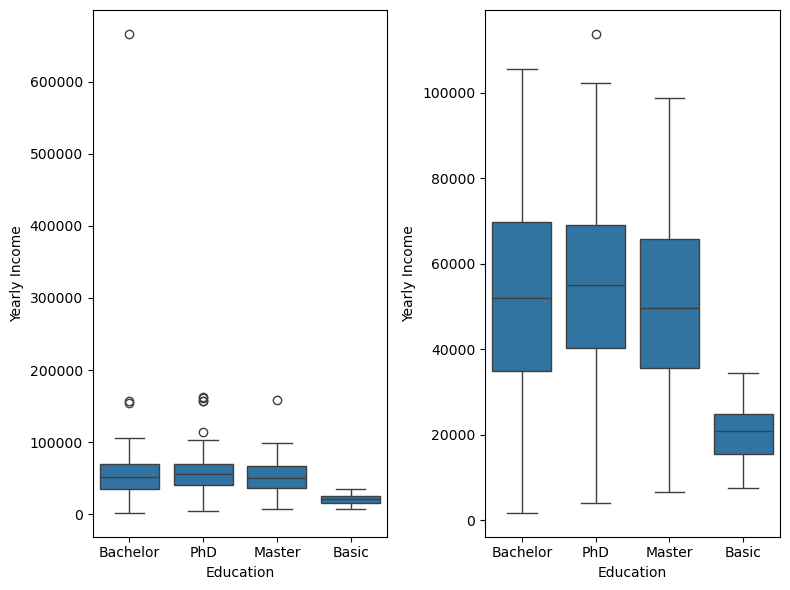

In [41]:
# 1. b. Customer Income based on ['Income']
plt.figure(figsize = (8,6))

plt.subplot(1,2,1)

sns.boxplot(data = df, y = 'Income', x = 'Education')
plt.ylabel('Yearly Income')
plt.xlabel('Education')

plt.subplot(1,2,2)

sns.boxplot(data = dfNoOutliers, y = 'Income', x = 'Education')
plt.ylabel('Yearly Income')
plt.xlabel('Education')

plt.tight_layout()
plt.show()

**Insight**

- The highest income held in 'Education' before removing outliers is in group 'PhD'
- The highest income held in 'Education' after removing outliers is in group 'Bachelor'

## 5. Is Website Activity Comparable To Any Other Methods?

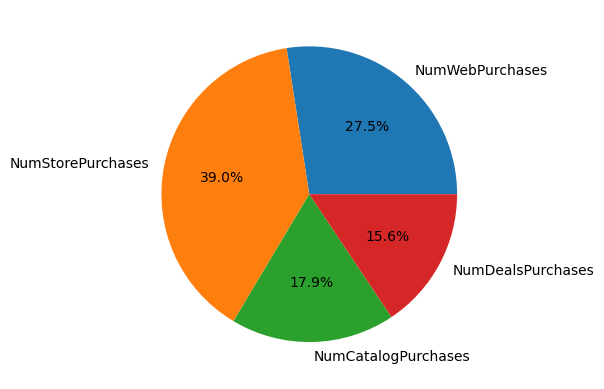

In [42]:
purchasesColumns = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases',  'NumDealsPurchases']
purchasesTotal = df[purchasesColumns].sum()

plt.pie(purchasesTotal, labels=purchasesColumns, autopct='%1.1f%%')
plt.show()

**Insight**
- Purchases made directly at the store is 11.5% higher than purchases made in the website.
- Generally it's comparable knowing that each of the method still held up to its place, none of it is half less than what website shopping has achieved.

In [43]:
from scipy.stats import f_oneway

In [44]:
f_stat, p_value = f_oneway(
    df['NumWebPurchases'],
    df['NumStorePurchases'],
    df['NumCatalogPurchases'],
    df['NumDealsPurchases']
)

if p_value < 0.05:
    print(f'{p_value:.3f}, deny H0, Atleast one significantly differs')
else:
    print(f'{p_value:.3f}, accept H0, All of the average is not significantly different')

0.000, deny H0, Atleast one significantly differs


# Generalizations / Evaluations

## Data Cleaning

### Null Value and Duplicates

In data cleaning we check all of the null value and duplicates, so far the null value is only 1% of the data and the duplicates is not available in this dataset. 

Knowing that the null value is very small compared to the whole data, it will not affect the data significantly by removing it.

### Value Uniqueness

In column ['Marital_Status'] and ['Education'] there are a total of 5 odd value.

['Marital_Status']
- Together
- Alone
- Absurd
- YOLO

These unique values is then changed to match the other available value options,

- Together -> Married
- Alone -> Single
- Absurd -> Single
- YOLO -> Single

['Education']
- 2n Cycle

After researching the data thoroughly the value '2n Cycle' is actually refering to the educational degree 'Master', 

- 2n Cycle -> Master

To ease data reading there is also one additional value that has been changed 'Graduation'.

- Graduation -> Bachelor

### Additional Column

In the data cleaning session, there are 4 new columns made.

- ['MntTotal'] : This new column serves as a presentation of total amount of money spent per customer
- ['TotalChildHome'] : Depict the total amount of children per customer's home
- ['TotalCmpAcc'] : Shows the total of campaign accepted by each customer
- ['NumPurchasesTotal'] : Sums up all the amount of purchases the customer has made.

### Data Loading

Data is saved as 'capstone 2 clean.csv' in the same directory as this capstone file location.

## Data Analysis / Data Exploring / EDA

### 1. What is Customer Behaviour

#### A. Is there any pairing in customer behaviour?

https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression

A simple search from the world wide web shows that a correleation is identified by:

- Very weak: 0 to 0.19
- Weak: 0.2 to 0.39
- Moderate: 0.4 to 0.59
- Strong: 0.6 to 0.79
- Very strong: 0.8 to 1.0

As shown from the heatmap, there is no strong correlation reaching more than 60%. The highest correlation achieved by customers is at 59% when the customer gets fish products and fruit at the same purchase, meanwhile the weakest correlation is standing low at only 35.7% for gold products and sweets.

Recommended approach:

- Relive a new campaign that discounts the price when a fish products and fruits is bought at the same purchase.
- Set a new campaing offer for a free set of sweet product after a certain amount of gold products purchases, so the customer experiences an introduction of sweet products.

#### B. Is customers expense based on their yearly income?

The scatterplot doesnt show any extreme fluctuations even tough we have had to remove the outliers to get a glimpse of the data clearly, the only trend that the Income againts MntTotal data visualization experiences is an upward trend, which means that the <b>customer income affects the customer expense<b>.

The higher the customer gets yearly the more the customer spends.

Recommended approach:

- Make an offer of customer subscription, targeting the customer with lower income by adding specialized offer of free products, discounts, etc. 

### 2. Store Income Based on Categories

#### A. Average Store Income Based off the column category ['Marital_Status']

In this data visualization we use the 'barplot' function, in the 'barplot' function we compare between column ['MntTotal'] and ['Marital_status']. From the data visualization we can see that the highest average store income per ['Marital_Status'] group is on group 'Widow', but this claim might be biased because the amount of customer that is labeled as 'Widow' might have a smaller population compared to the whole. To show the whole distribution of the data spread we call the 'boxplot' function.

In [45]:
df['Marital_Status'].value_counts()

Marital_Status
Married     1430
Single       478
Divorced     232
Widow         76
Name: count, dtype: int64

After calling the 'boxplot' function we can then bring to a conclusion of the data distribution not only the average.

Recommended approach:

- This problem could easily be fixed at a specific date, valentine should be a great time to give either the broken hearted or the lovey dovey ones a chance of attraction. ex:
  - Spesific discount for couples, by giving discount to 'married' people if they perchance shop together.
  - Make a package mix with items for broken hearted people ex: a package filled with tissues and scented candles.

#### B. Average Store Income Based off the column category ['Education']

The Average of store income based on the categories on column ['Education'] is held by the group 'Master'.

Recommended approach:

- Special campaign event where customers with higher education status gets more discount.

### 3. The campaign is most famous on which category?


#### A. Which category on column ['Education'] accepts the campaign most.

On this part we must make a seperate data frame removing the customers that does not accept any campaign avialable, the data frame is then named as 'dfFilterTotalCmpAcc'. With this part now done, making the data visualization is the next step to making a great data analyst.

We can now conclude that most of the people that accepted the campaign based of the column ['Education'] comes from the group 'Bachelor' standing on a high percentage of 49.7% dominating the rest of the group by half of the entire population.

Recommended approach:

- Form a specified group offering the campaign targeting the group with less campaign accepted value.

#### B. Which category on column ['Marital_Status'] accepts the campaign most.

The category from column ['Marital_Status'] that thrist most for campaign is on group 'Married' standing high at 64.5% of the population.

Recommended approach:

- Form a specified group offering the campaign targeting the group with less campaign accepted value.

### 4. Customers Income Based on Categories 

#### A. Based on column ['Marital_Status']

On this session we split the data visualization into two parts, one including the outliers and the other with the outliers removed. The data visualization with outliers is not easily readable therefore we add another column that is already conditioned.

Before the cleaning we can simplify the result by looking at the data visualization, the highest recorded yearly income is placed on group 'Married' but because the highest income is only held by one singular customer we clean the data by removing the outliers. After the cleaning the highest data recorded has changed, setting the highest holder on group 'Single'.

#### B. Based on column ['Education']

Unlike column ['Marital_Status'], the highest recorded data before and after cleaning is the same (excluding outliers). Column ['Education'] yearly income is stable with group 'Bachelor' as the top data before and after cleaning.

### 5. Is Website Activity Comparable to any other methods?

#### Method Comparison

Customer purchasing activity is split into 4 parts store purchasing, website purchasing, catalog purchasing and discount purchasing. In this spesific part we are comparing wether the website purchasing activity is comparable to any other methods.

From the piechart we can see that website purchasing is not actually the most popular way of shopping, its ranked as the second most preferable way of shopping, one after store purchasing (39.0%). We can now conclude that it is more likely comparable to the other methods, but do they differ a significant much in their value count?.

In the piechart it is shown that website purchases has 27.5% percent of the population meanwhile the other two less known method distributes evenly between each other therefore not having a lot of difference 17.9% (Catalog) and 15.6% (Discount). In conclusion, website purchases is comparable to the other methods available.

In [46]:
df['NumWebPurchases'].sum()/df['NumWebVisitsMonth'].sum()

0.7680495461101213

#### Website Activity

Customer that visits the website has a 77% of purchasing something.

Recommended approach:

- Develop offers only available in website purchases